## The Architect

import packages:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, preprocessing
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from matplotlib.pyplot import figure

scaler = preprocessing.RobustScaler()

import data:

In [16]:
file = pd.ExcelFile('data.xlsx')
data = pd.read_excel(file, sheet_name=None)

In [17]:
serviceList = data['ServiceList']
callerCallee = data['CallerCallee']
commonChanges = data['CommonChanges']

In [18]:
serviceList = serviceList.sort_values(by=['Service'])
serviceList.head()

Service
1804  Assign_BAFOX
3115  Assign_BEHOT
930   Assign_BETES
56    Assign_BIKAN
2241  Assign_BIXEQ

In [19]:
callerCallee.NumberOfCallsLastYear = scaler.fit_transform(callerCallee[['NumberOfCallsLastYear']])
callerCallee = callerCallee.sort_values(by=['NumberOfCallsLastYear'], ascending=False)
callerCallee.head()

Caller            Callee  NumberOfCallsLastYear
1056   Reject_FACET        Stop_PENEL              16.654275
596     Renew_HITOK       Start_XEMAL              16.520033
969     Round_PIRAX  Initialize_TEXEK              16.482858
1058  Convert_QULOX        Stop_PENEL              16.455081
238    Delete_LUFAX   Transform_GEBAS              16.424308

In [20]:
commonChanges.NumberOfCommonChanges = scaler.fit_transform(commonChanges[['NumberOfCommonChanges']])
commonChanges = commonChanges.sort_values(by=['NumberOfCommonChanges'], ascending=False)
commonChanges.head()

Service1       Service2  NumberOfCommonChanges
6232    Assign_ZEBAV     Stop_WUXES                  543.0
6207      Stop_WUXES   Assign_ZEBAV                  543.0
11123    Round_RUKAG  Trigger_MADOV                  379.0
11091  Trigger_MADOV    Round_RUKAG                  379.0
11090  Trigger_MADOV   Delete_HIZOR                  319.0

In [21]:
serviceList[['Service_num']] = serviceList.apply(lambda x : x.astype('category').cat.codes)
serviceList.sort_values(by=['Service']).head()

Service  Service_num
1804  Assign_BAFOX            0
3115  Assign_BEHOT            1
930   Assign_BETES            2
56    Assign_BIKAN            3
2241  Assign_BIXEQ            4

In [22]:
service_dict = pd.Series(serviceList.Service_num.values, index=serviceList.Service.values).to_dict()

In [23]:
callerCallee['Caller_num'] = callerCallee.Caller.map(service_dict)
callerCallee['Callee_num'] = callerCallee.Callee.map(service_dict)

callerCallee.head()

Caller            Callee  NumberOfCallsLastYear  Caller_num  \
1056   Reject_FACET        Stop_PENEL              16.654275        1532   
596     Renew_HITOK       Start_XEMAL              16.520033        1688   
969     Round_PIRAX  Initialize_TEXEK              16.482858        1998   
1058  Convert_QULOX        Stop_PENEL              16.455081         498   
238    Delete_LUFAX   Transform_GEBAS              16.424308         607   

      Callee_num  
1056        2683  
596         2598  
969         1063  
1058        2683  
238         2914

In [24]:
commonChanges['Service1_num'] = commonChanges.Service1.map(service_dict)
commonChanges['Service2_num'] = commonChanges.Service2.map(service_dict)

commonChanges.head()

Service1       Service2  NumberOfCommonChanges  Service1_num  \
6232    Assign_ZEBAV     Stop_WUXES                  543.0           131   
6207      Stop_WUXES   Assign_ZEBAV                  543.0          2730   
11123    Round_RUKAG  Trigger_MADOV                  379.0          2015   
11091  Trigger_MADOV    Round_RUKAG                  379.0          3077   
11090  Trigger_MADOV   Delete_HIZOR                  319.0          3077   

       Service2_num  
6232           2730  
6207            131  
11123          3077  
11091          2015  
11090           590

Text(0.5, 0, 'Number of Communication')

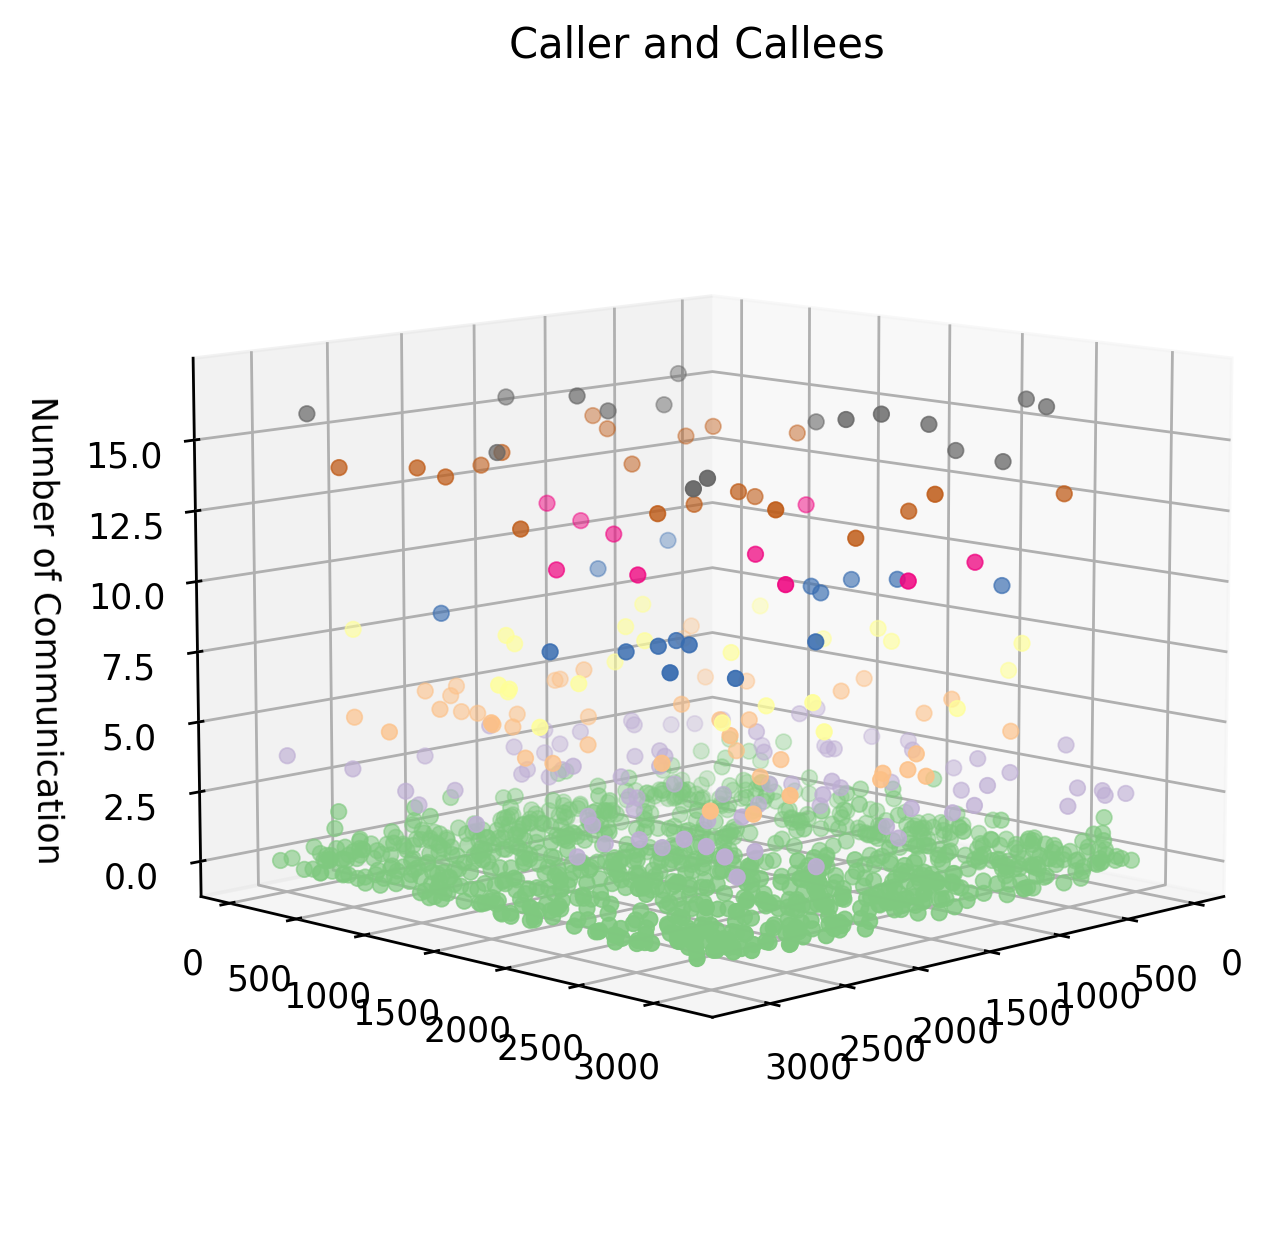

In [25]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
figure(figsize=(8, 6), dpi=250)
ax = plt.axes(projection='3d')
ax.view_init(10, 45)
ax.scatter(callerCallee.Caller_num,
           callerCallee.Callee_num,
           callerCallee.NumberOfCallsLastYear,
           c=callerCallee.NumberOfCallsLastYear,
           cmap='Accent', linewidth=0.5);
ax.set_title('Caller and Callees')
ax.set_zlabel('Number of Communication')

Text(0.5, 0, 'Number of changes')

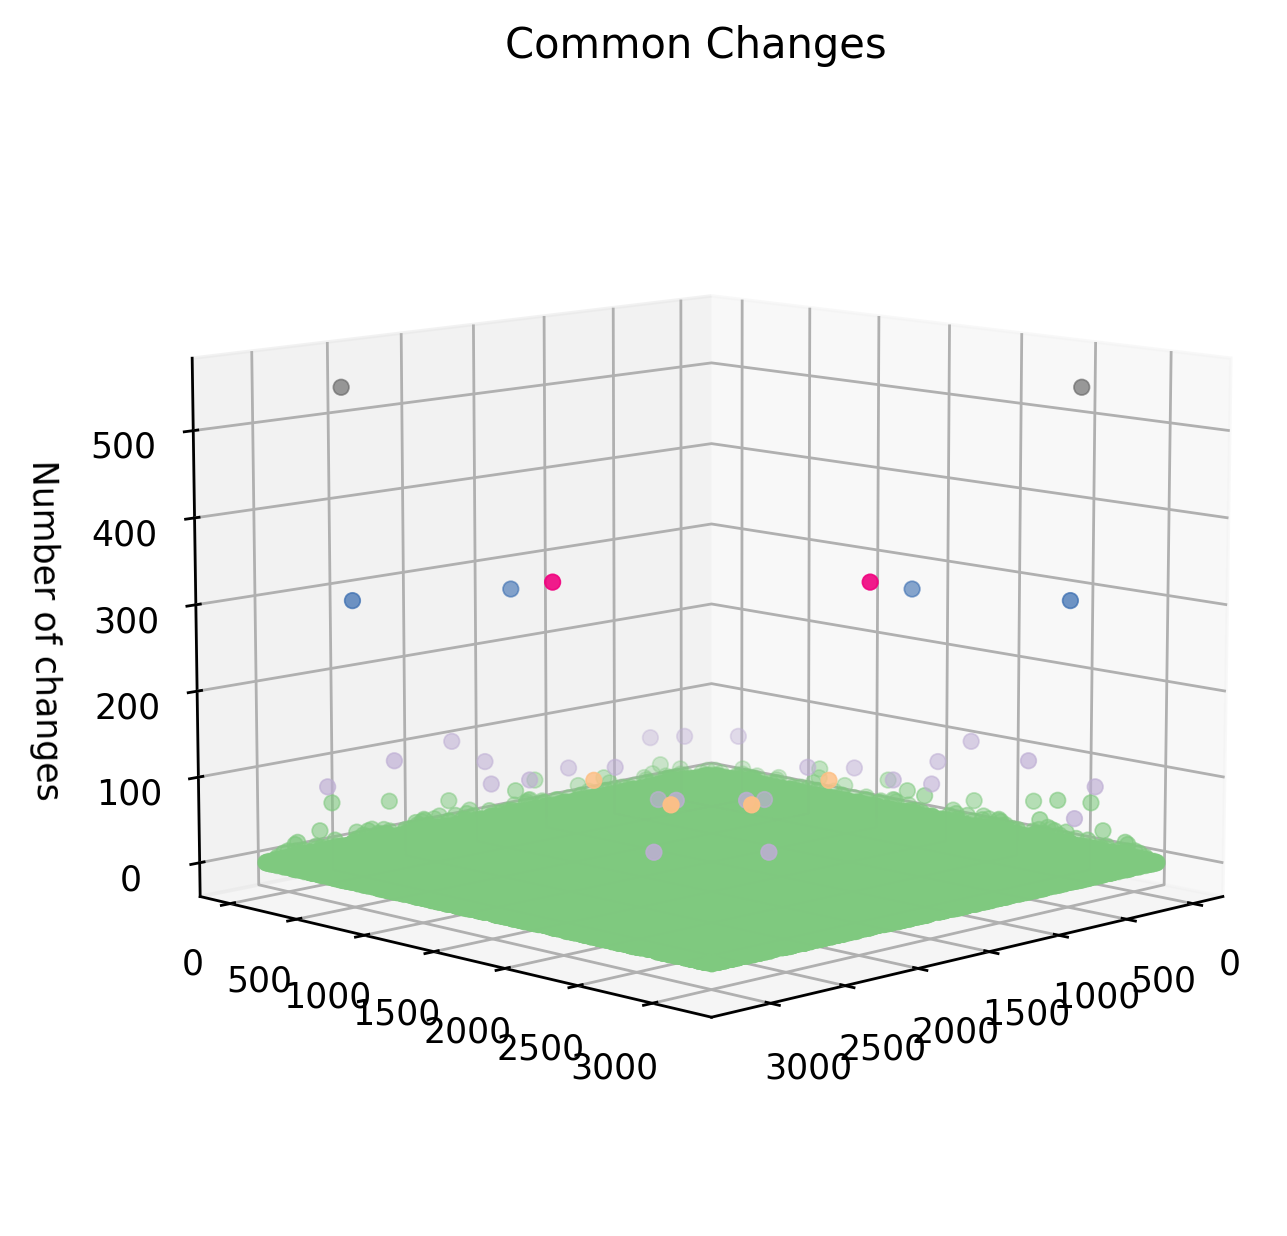

In [26]:
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]
figure(figsize=(6, 6), dpi=250)
ax = plt.axes(projection='3d')
ax.view_init(10, 45)
ax.scatter(commonChanges.Service1_num,
           commonChanges.Service2_num,
           commonChanges.NumberOfCommonChanges,
           c=commonChanges.NumberOfCommonChanges,
           cmap='Accent', linewidth=0.5);
ax.set_title('Common Changes')
ax.set_zlabel('Number of changes')